In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

plt.style.use('ggplot')

In [75]:
df = pd.read_csv("training.csv", sep=";")
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [76]:
print(df.shape)
print(df["Date"].nunique())
print(df["Date"].value_counts())

(70240, 24)
3120
2014-04-13    30
2013-08-29    30
2013-11-24    30
2013-07-03    30
2014-05-13    30
2013-09-05    30
2013-11-06    30
2014-01-09    30
2013-05-28    30
2014-06-22    30
2014-03-23    30
2014-01-12    30
2013-04-01    30
2013-06-10    30
2013-12-22    30
2014-01-23    30
2014-05-20    30
2013-09-26    30
2013-06-26    30
2013-12-14    30
2014-01-19    30
2013-03-12    30
2013-10-19    30
2013-07-28    30
2013-09-03    30
2014-07-28    30
2013-07-17    30
2013-08-18    30
2013-08-19    30
2013-06-25    30
              ..
2016-05-03     1
2007-12-22     1
2016-02-17     1
2016-06-05     1
2016-02-02     1
2016-01-16     1
2016-03-15     1
2007-11-12     1
2016-07-03     1
2016-05-04     1
2007-11-15     1
2008-01-08     1
2016-08-04     1
2016-06-02     1
2016-04-17     1
2016-03-02     1
2016-07-02     1
2016-05-26     1
2016-01-24     1
2016-03-16     1
2016-02-05     1
2016-03-31     1
2016-07-26     1
2016-01-23     1
2016-07-07     1
2008-01-27     1
2016-06-23    

In [77]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,69882.000000,70080.000000,69428.000000,42191.000000,37113.000000,65579.000000,69212.000000,69152.000000,69185.000000,69305.000000,45778.000000,45115.000000,69502.000000,69581.000000,70240.000000
mean,11.355741,22.152277,2.472825,4.925332,7.229785,39.641044,13.557519,18.313801,71.686551,53.264873,4.531478,4.640386,15.879927,20.721841,2.484011
std,6.292392,6.830980,8.810472,3.614322,3.820706,14.228323,9.242076,9.275690,17.734285,20.350925,2.866080,2.665981,6.202170,6.642916,8.813653
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,6.800000,17.300000,0.000000,2.400000,4.300000,30.000000,7.000000,11.000000,60.000000,39.000000,1.000000,2.000000,11.400000,16.000000,0.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,5.000000,5.000000,15.800000,20.300000,0.000000
75%,16.200000,26.800000,0.800000,6.600000,10.300000,48.000000,19.000000,24.000000,85.000000,67.000000,7.000000,7.000000,20.500000,25.200000,0.800000
max,30.500000,47.300000,371.000000,64.800000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,9.000000,8.000000,37.700000,46.100000,371.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 24 columns):
Date             70240 non-null object
Location         70240 non-null object
MinTemp          69882 non-null float64
MaxTemp          70080 non-null float64
Rainfall         69428 non-null float64
Evaporation      42191 non-null float64
Sunshine         37113 non-null float64
WindGustDir      65571 non-null object
WindGustSpeed    65579 non-null float64
WindDir9am       63981 non-null object
WindDir3pm       68343 non-null object
WindSpeed9am     69212 non-null float64
WindSpeed3pm     69152 non-null float64
Humidity9am      69185 non-null float64
Humidity3pm      69305 non-null float64
Pressure9am      62341 non-null object
Pressure3pm      62389 non-null object
Cloud9am         45778 non-null float64
Cloud3pm         45115 non-null float64
Temp9am          69502 non-null float64
Temp3pm          69581 non-null float64
RainToday        69428 non-null object
RISK_MM          70

Есть некоторые проблемы с Pressure9am, Pressure3pm. Приведем их к numeric

In [79]:
df["Pressure9am"] = pd.to_numeric(df["Pressure9am"], errors='coerce')
df["Pressure3pm"] = pd.to_numeric(df["Pressure3pm"], errors='coerce')

In [80]:
label = "RainTomorrow"
real_vars = ["MinTemp",
             "MaxTemp",
             "Rainfall",
             "Evaporation",
             "Sunshine",
             "WindGustSpeed",
             "WindSpeed9am",
             "WindSpeed3pm",
             "Humidity9am",
             "Humidity3pm",
             "Pressure9am",
             "Pressure3pm",
             "Cloud9am",
             "Cloud3pm",
             "Temp9am",
             "Temp3pm",
             "RISK_MM"]

cat_vars = ["Location",
             "WindGustDir",
             "WindDir9am",
             "WindDir3pm",
             "RainToday"]

In [81]:
def polarangle(x, y):
        P = 3.14159265358979323846
        q = math.atan2(y, x)
        if q < 0:
            q += 2 * P
        return q

dirdi = {"N": 1,
        "NNE": 2,
        "NE": 3,
        "ENE": 4,
        "E": 5,
        "ESE": 6,
        "SE": 7,
        "SSE": 8,
        "S": 9,
        "SSW": 10,
         "SW": 11,
        "WSW": 12,
        "W": 13,
        "WNW": 14,
        "NW": 15,
        "NNW": 16 }
P = 3.14159265358979323846
def stoa(s):
    if type(s) ==  str:
        return (P * 2.5 - (dirdi[s] - 1) * P / 8) % (P * 2)
    else:
        return s

dat = ["WindDir9am", "WindDir3pm", "WindGustDir"]
def changevec(x):
    for a in dat:
        #print(pd.notnull(x[a]))
        #print(x[a], pd.isnull(x[a]))
        if (pd.isnull(x[a])):
            for i in dat:

                if (pd.notnull(x[i])):
                    #print(x[i])
                    x[a] = stoa(x[i])
                    break
            #print(x)
        else:
            x[a] = stoa(x[a])
    return x

df = df.apply(changevec, axis=1)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,3.141593,44.0,3.141593,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,2.748894,44.0,1.963495,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,3.534292,46.0,3.141593,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,0.785398,24.0,5.497787,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,3.141593,41.0,0.392699,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,2.748894,56.0,3.141593,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,3.141593,50.0,3.926991,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,3.141593,35.0,5.105088,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,1.963495,80.0,5.497787,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,3.141593,28.0,4.712389,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


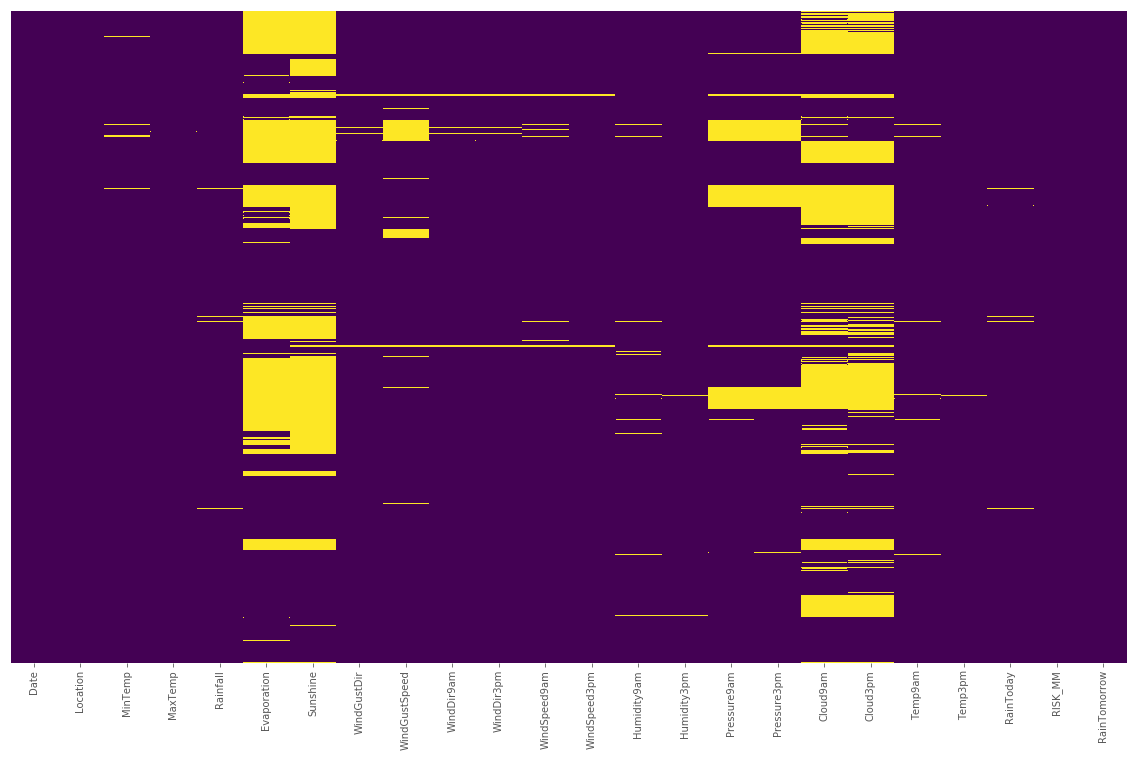

In [82]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [83]:
df["Evaporation"].isnull().sum()

28049

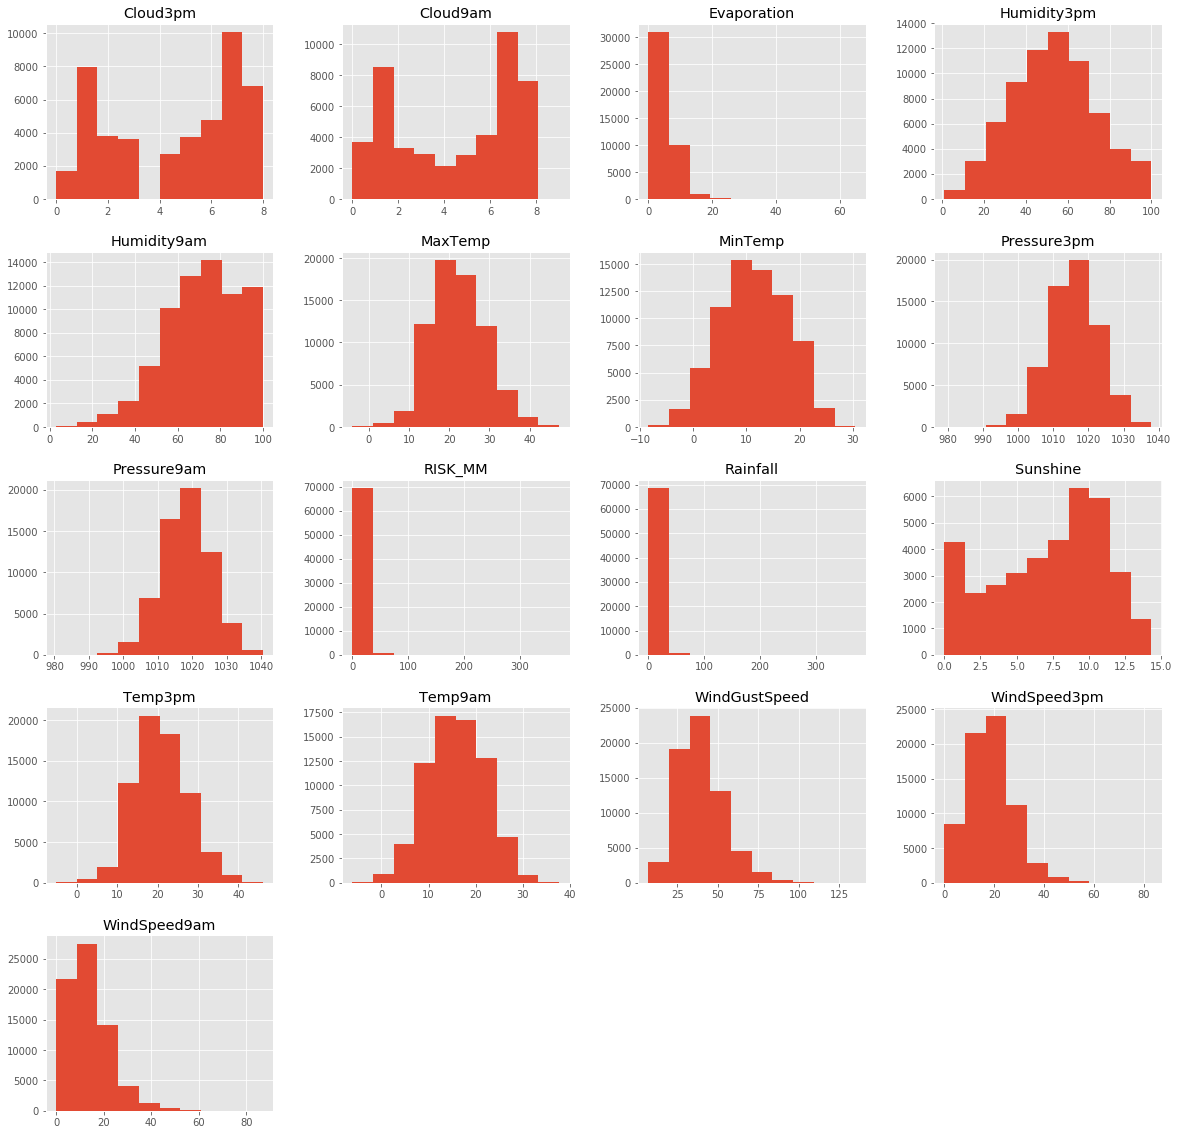

In [84]:
df[real_vars].hist(figsize=(20, 20));

# Препроцесинг

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


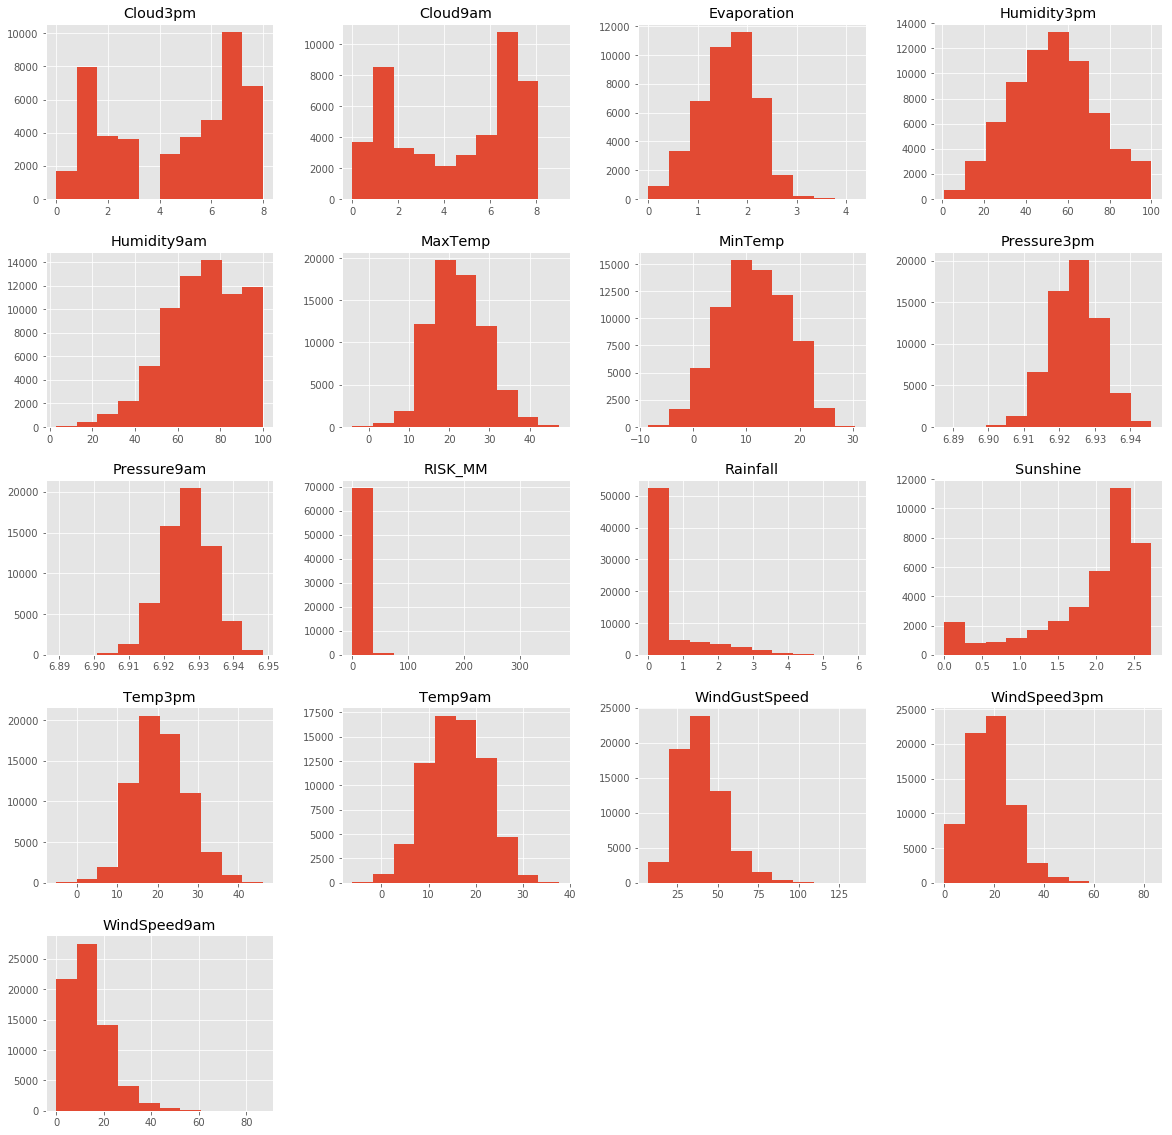

In [85]:
#Логорифмировать
vars_to_log = ["Rainfall", "Evaporation", "Sunshine", "Pressure3pm", "Pressure9am"]
df[vars_to_log] = df[vars_to_log].apply(lambda w: np.log(w + 1))
real_vars_hist = df[real_vars].hist(figsize=(20, 20))
#Пожать категориальные 

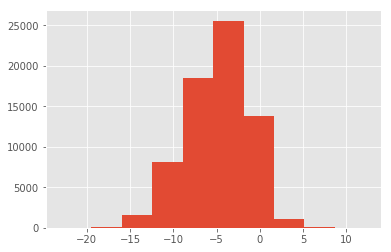

In [86]:
(df["Temp9am"] - df["Temp3pm"]).hist()

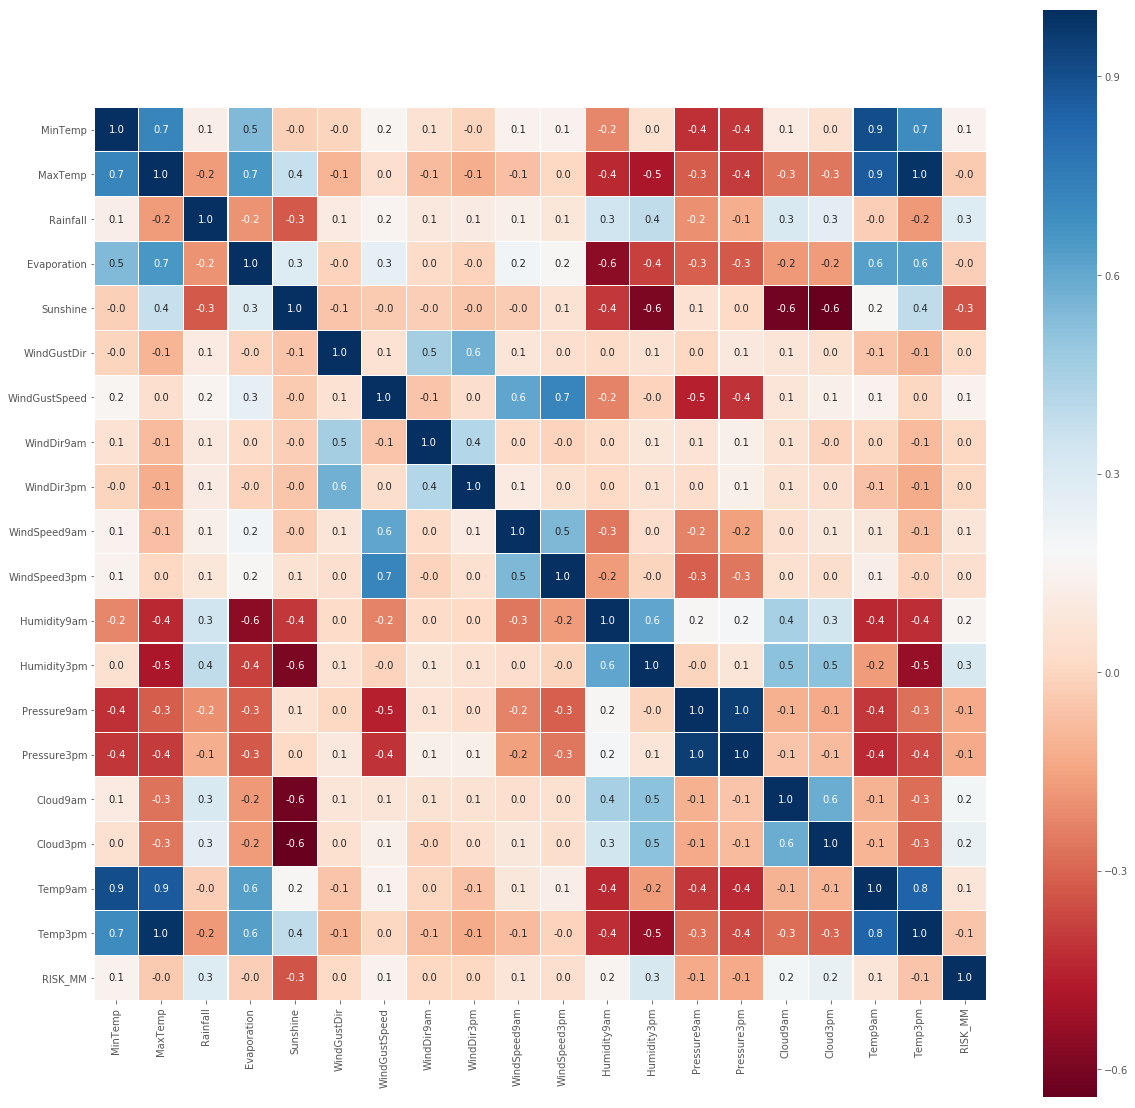

In [87]:
plt.figure(figsize=(20,20))
corr = df.corr() 
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

## Scatter coor to RISK_MM

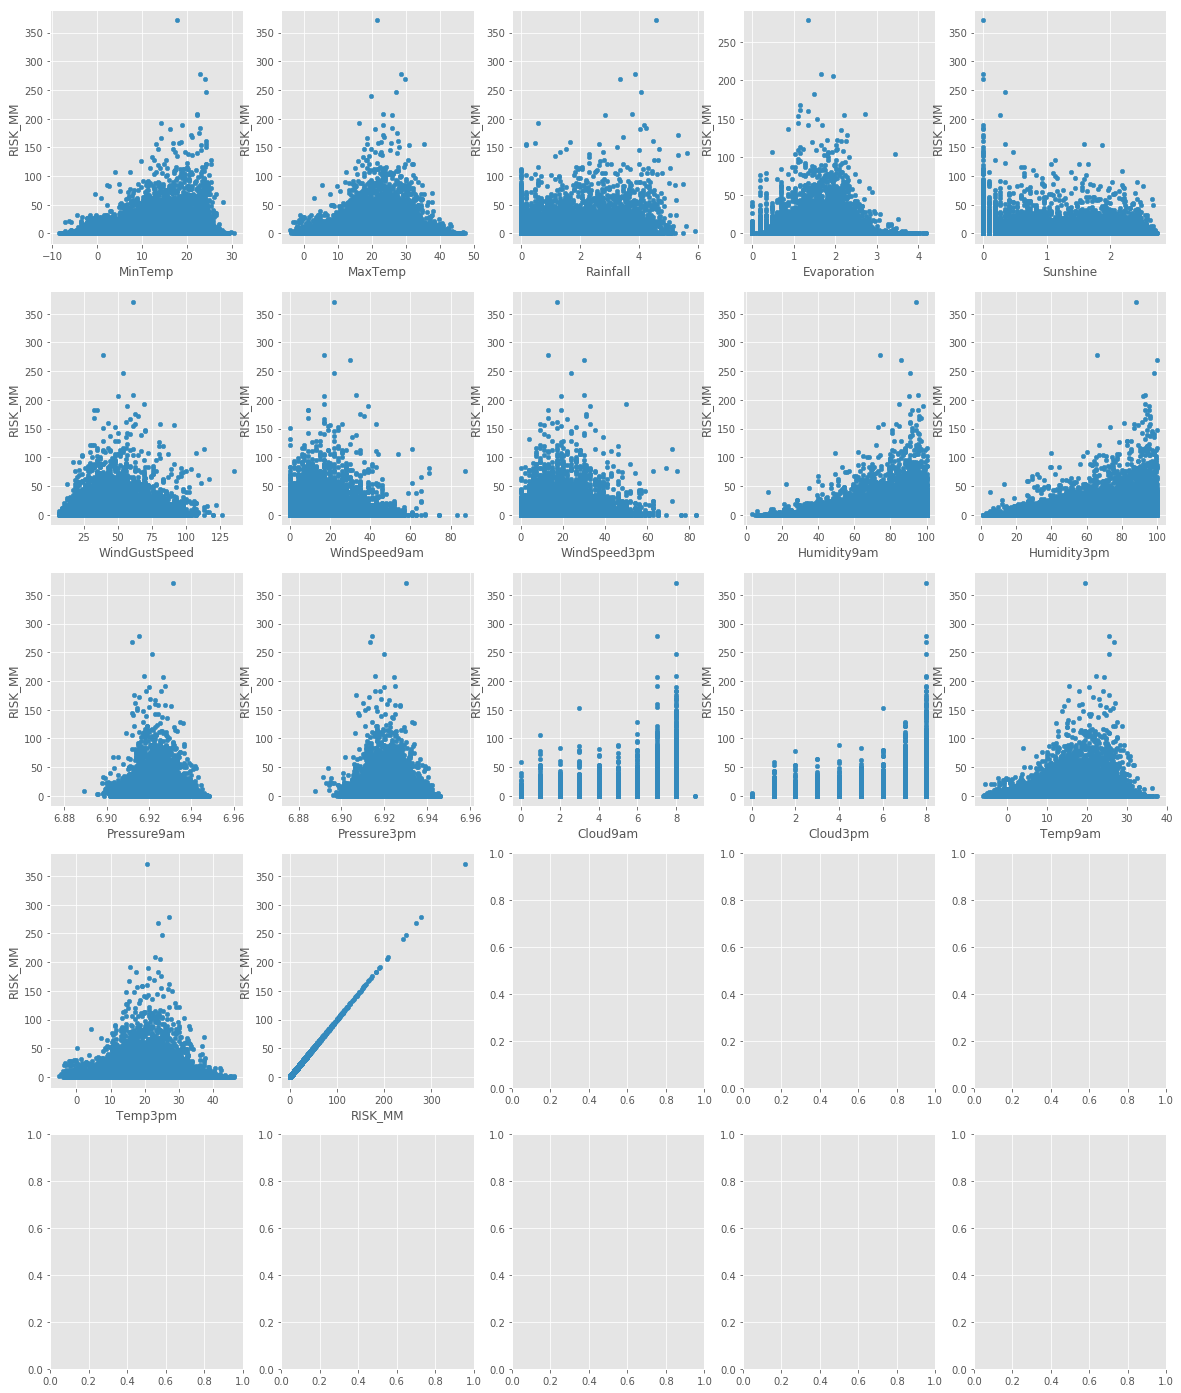

In [88]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 25))

for i, feature in enumerate(df[real_vars]):
    df.plot(feature, "RISK_MM", subplots=True, kind="scatter", ax=axes[i // 5, i % 5])

# Feature extracting

## Temperature delta

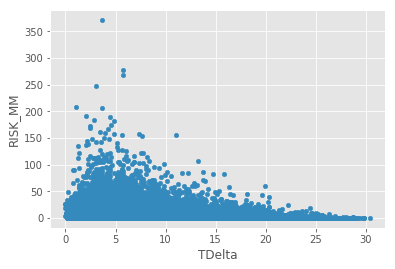

In [ ]:
df["TDelta"] = (df["MinTemp"] - df["MaxTemp"]).apply(abs)
df
df.plot("TDelta", "RISK_MM", kind="scatter")

## PressureDelta

In [ ]:
# df["PressureDelta"] = (df["Pressure9am"] - df["Pressure3pm"]).apply(abs)
# df
# df.plot("PressureDelta", "RISK_MM", kind="scatter")

## Year

In [ ]:
df['Year']=df['Date'].apply(lambda x: x[:4])
df['Year']

0        2008
1        2008
2        2008
3        2008
4        2008
5        2008
6        2008
7        2008
8        2008
9        2008
10       2008
11       2008
12       2008
13       2008
14       2008
15       2008
16       2008
17       2008
18       2008
19       2008
20       2008
21       2008
22       2008
23       2008
24       2008
25       2008
26       2008
27       2008
28       2008
29       2008
         ... 
70210    2015
70211    2015
70212    2015
70213    2015
70214    2015
70215    2015
70216    2015
70217    2015
70218    2015
70219    2015
70220    2015
70221    2015
70222    2015
70223    2015
70224    2015
70225    2015
70226    2015
70227    2015
70228    2015
70229    2015
70230    2015
70231    2015
70232    2015
70233    2015
70234    2015
70235    2015
70236    2015
70237    2015
70238    2015
70239    2015
Name: Year, Length: 70240, dtype: object

## Season

In [ ]:
df["Month"] = df["Date"].apply(str).apply(lambda x: x[5:7]).apply(int)
df["Month"]

0        12
1        12
2        12
3        12
4        12
5        12
6        12
7        12
8        12
9        12
10       12
11       12
12       12
13       12
14       12
15       12
16       12
17       12
18       12
19       12
20       12
21       12
22       12
23       12
24       12
25       12
26       12
27       12
28       12
29       12
         ..
70210     8
70211     8
70212     8
70213     8
70214     8
70215     8
70216     8
70217     8
70218     8
70219     8
70220     8
70221     8
70222     8
70223     9
70224     9
70225     9
70226     9
70227     9
70228     9
70229     9
70230     9
70231     9
70232     9
70233     9
70234     9
70235     9
70236     9
70237     9
70238     9
70239     9
Name: Month, Length: 70240, dtype: int64

In [ ]:
def monthToSeason(month):
    return month // 4
df["Season"] = df["Month"].apply(monthToSeason)
df["Season"]

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
70210    2
70211    2
70212    2
70213    2
70214    2
70215    2
70216    2
70217    2
70218    2
70219    2
70220    2
70221    2
70222    2
70223    2
70224    2
70225    2
70226    2
70227    2
70228    2
70229    2
70230    2
70231    2
70232    2
70233    2
70234    2
70235    2
70236    2
70237    2
70238    2
70239    2
Name: Season, Length: 70240, dtype: int64

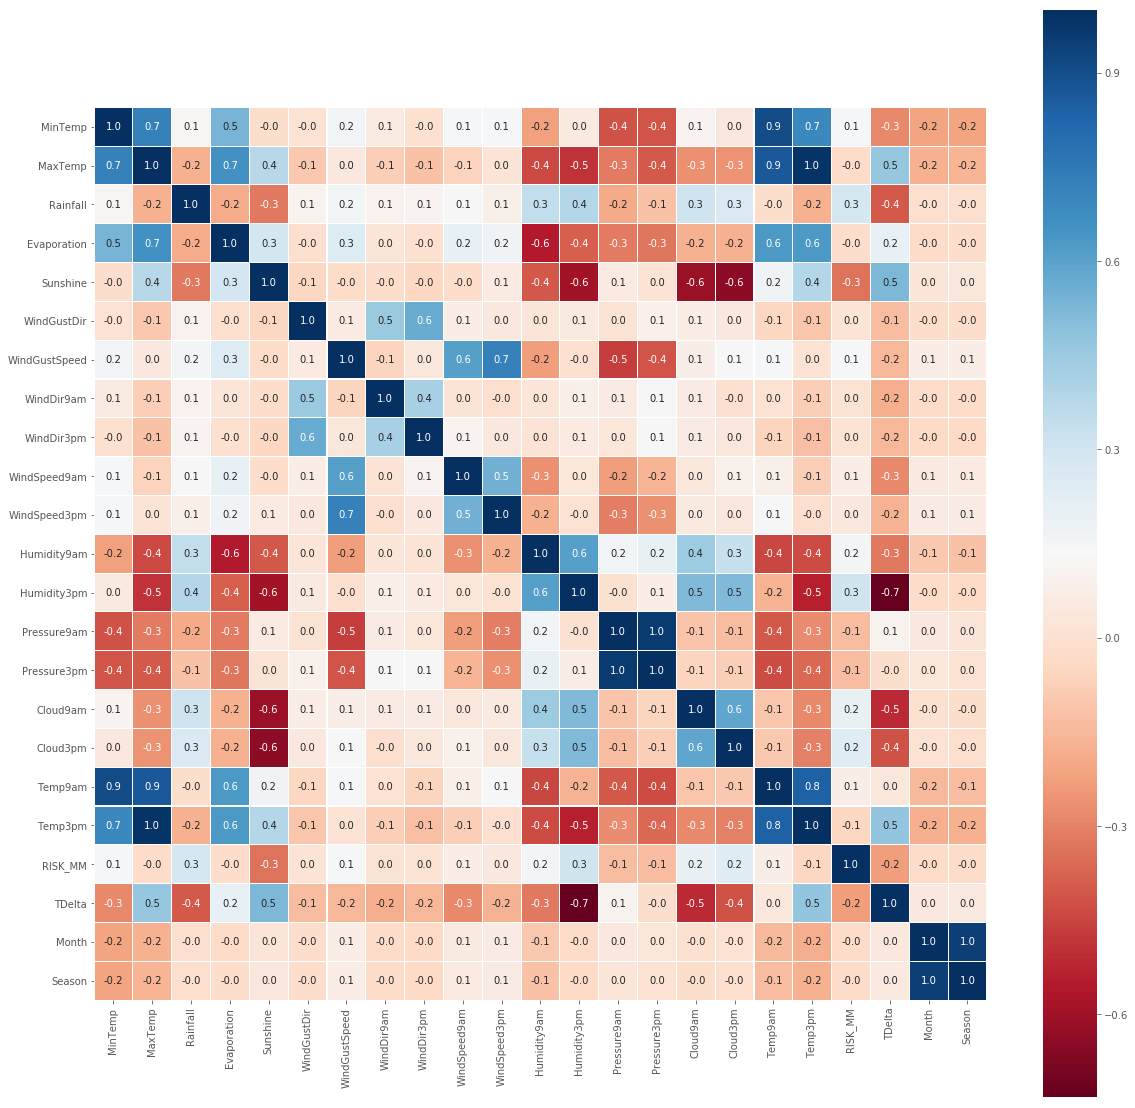

In [ ]:
plt.figure(figsize=(20,20))
corr = df.corr() 
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

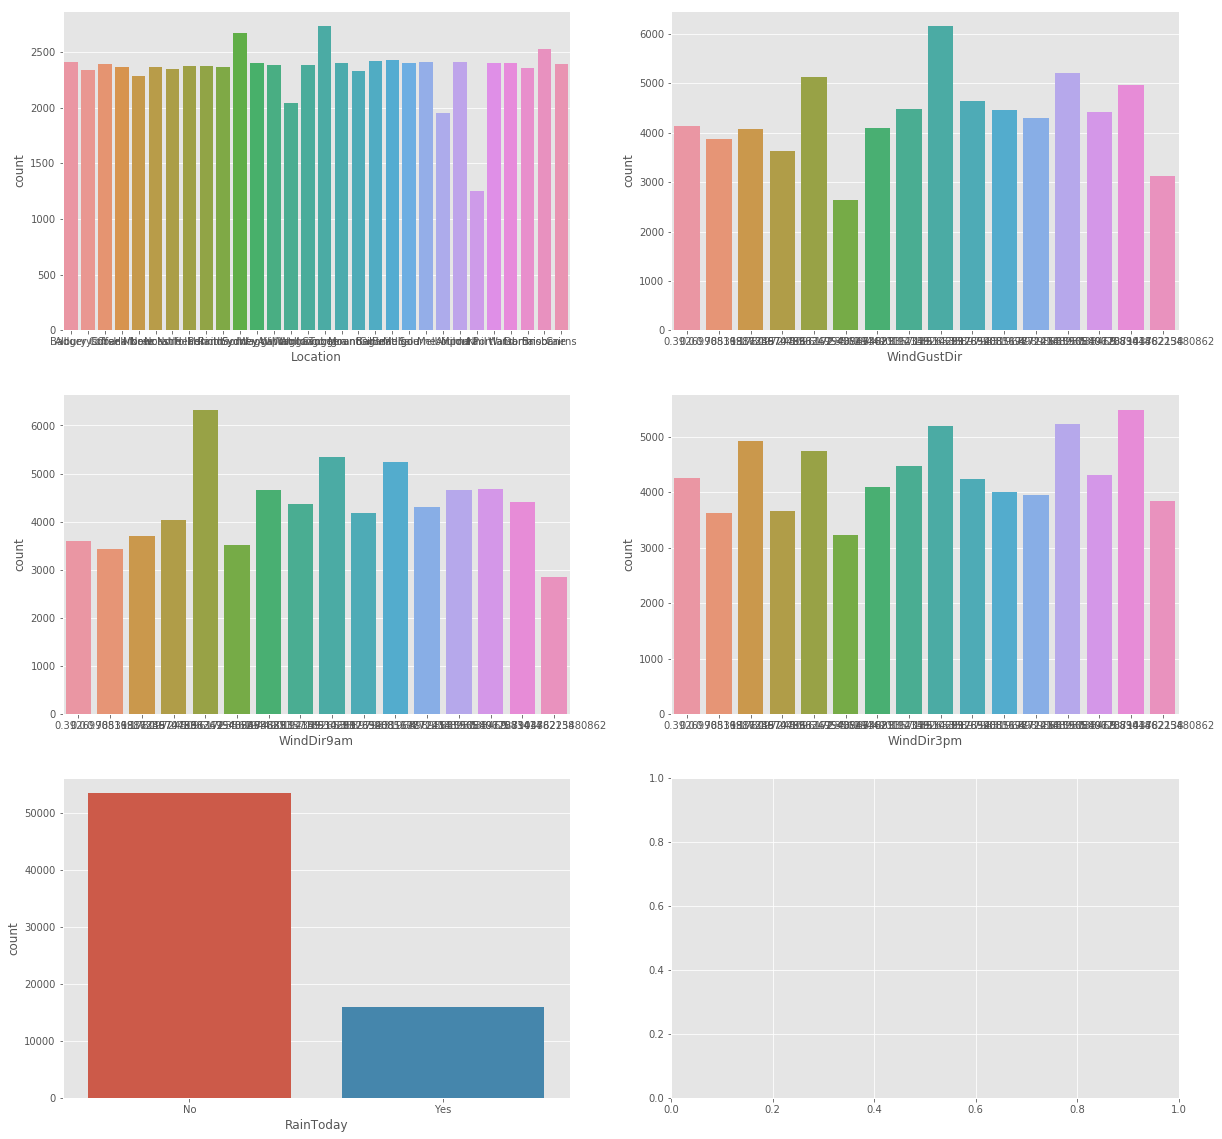

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(20, 20))

for i in range(len(cat_vars)):
    sns.countplot(x = cat_vars[i], data = df, ax = axes[i // 2, i % 2])

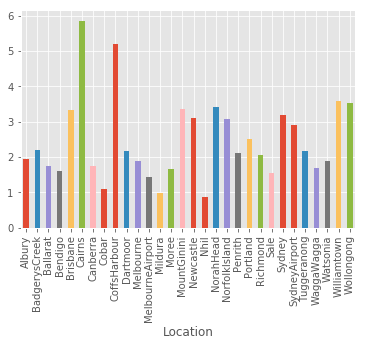

In [ ]:
df.groupby("Location").describe()["RISK_MM"]["mean"].plot.bar()

## Интересный признак)

In [ ]:
print(df[df[label] == "Yes"]["RISK_MM"].value_counts().sort_index())
print(df[df[label] == "No"]["RISK_MM"].value_counts().sort_index())

1.2      795
1.4      699
1.5        4
1.6      615
1.7        1
1.8      583
2.0      550
2.2      512
2.4      458
2.5        1
2.6      435
2.8      385
3.0      367
3.1        1
3.2      323
3.3        1
3.4      326
3.6      275
3.8      288
4.0      280
4.1        1
4.2      283
4.4      239
4.6      239
4.8      218
4.9        2
5.0      247
5.2      209
5.3        1
5.4      205
        ... 
139.0      1
140.2      1
141.8      1
142.2      1
145.0      1
147.2      1
147.8      1
150.2      1
153.2      1
155.0      1
156.0      1
157.6      1
157.8      1
159.8      1
161.6      1
166.8      1
168.4      1
172.2      1
175.2      1
182.6      1
183.0      1
189.0      1
192.0      1
206.2      1
208.5      1
240.0      1
247.2      1
268.6      1
278.4      1
371.0      1
Name: RISK_MM, Length: 514, dtype: int64
0.0    43715
0.1       51
0.2     4823
0.3        7
0.4     2007
0.5       10
0.6     1357
0.7        4
0.8     1051
0.9        2
1.0      946
Name: RISK_MM, dtype: i

## Обработаем пропущенные значения
Как будем заполнять? Самый простой вариант, заполнить либо нулями, либо средними, медианными и т.д. значениями. Но очевидно, что влажность, кол-во солнечных дней, облачность - зависят от климматического пояса, и и имеют большую корреляцию, с этим же параметром, в этой же локации, но в предыдущем году

In [ ]:
import math
def fixByLocationAndMonth(feature, df):
    evaporationsLM = df[df[feature].isnull() == False].groupby(["Location", "Month"]).describe()[feature]["mean"]
    na_evaporation = df[df[feature].isnull()]

    def FillNAEvaporation(x):
        if (math.isnan(x[feature])):
            try:
                return evaporationsLM[(x["Location"], x["Month"])]
            except:
                try:
                    return evaporationsLM[x["Location"]].mean()
                except:
                    return df[feature].mean()
        else:
            return x[feature]
        
    df[feature] = df.apply(FillNAEvaporation, axis = 1)
    
fixByLocationAndMonth("Evaporation", df)
fixByLocationAndMonth("Sunshine", df)
fixByLocationAndMonth("Cloud9am", df)
fixByLocationAndMonth("Cloud3pm", df)

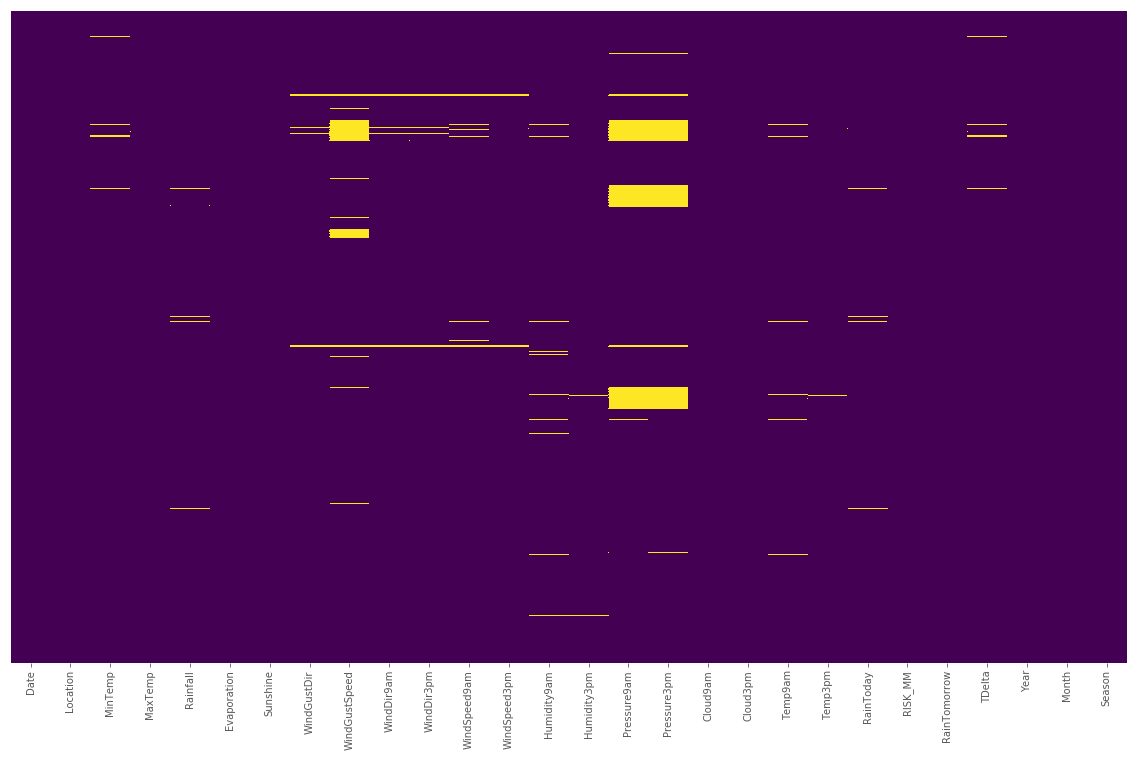

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Удалим некоторые переменные

In [ ]:
data = df.copy()
real_vars.append("TDelta")
print(real_vars)
to_drop = ["Date", "RISK_MM", "Season", "Pressure3pm", "Pressure9am"]#, "WindDir9am", "WindDir3pm", "WindGustDir"]

data = data.drop(columns = to_drop)
data = data.dropna()


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'TDelta']


In [ ]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
knn = KMeans(n_clusters=8)

In [ ]:
dataCL = df.copy()#pd.read_csv('training.csv',sep=';')
dataCL['Year'] = dataCL['Date'].apply(lambda x: x[:4])

In [ ]:
group = dataCL.groupby(['Year','Location'],as_index=False)
res = group.describe()[[('MinTemp','mean'),('MaxTemp','mean'),('Rainfall','mean'),('Humidity9am','mean'),('Humidity3pm','mean')]]
res

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm
,mean,mean,mean,mean,mean
0,12.545902,25.086885,0.688063,69.557377,45.786885
1,13.680000,27.383333,0.497448,55.666667,33.566667
2,8.770968,21.377419,0.532592,70.677419,46.935484
3,11.035484,25.254839,0.428268,57.387097,31.709677
4,14.715934,24.993989,0.581072,61.000000,52.175824
5,24.480645,32.606452,0.870344,69.129032,64.709677
6,7.048087,20.437978,0.366488,70.467213,43.016393
7,10.232065,19.419022,0.425714,63.407609,46.266304
8,5.787097,15.590323,0.684359,76.421053,64.086957


In [ ]:
res.fillna(0,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
scaler.fit(res)
scaled_res = scaler.transform(res)
for_training = pd.DataFrame(scaled_res)

In [ ]:
knn.fit(for_training)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=1, perplexity=35)
tsne_repr=tsne.fit_transform(scaled_res)

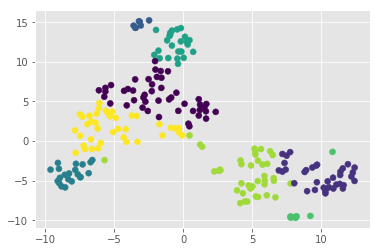

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(tsne_repr[:,0],tsne_repr[:,1], c = knn.labels_, cmap = 'viridis')

In [ ]:
from sklearn.cluster import AgglomerativeClustering as AGC

agc = AGC(n_clusters=4, affinity='euclidean', linkage='ward')
agc.fit(scaled_res)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

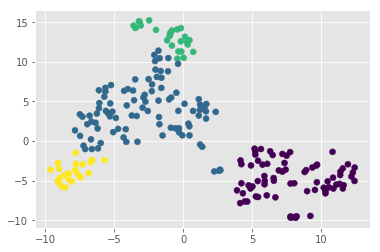

In [ ]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1], c = agc.labels_, cmap = 'viridis')

In [ ]:
res['label'] = agc.labels_

In [ ]:
res

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,label
,mean,mean,mean,mean,mean,
0,12.545902,25.086885,0.688063,69.557377,45.786885,0
1,13.680000,27.383333,0.497448,55.666667,33.566667,3
2,8.770968,21.377419,0.532592,70.677419,46.935484,1
3,11.035484,25.254839,0.428268,57.387097,31.709677,3
4,14.715934,24.993989,0.581072,61.000000,52.175824,0
5,24.480645,32.606452,0.870344,69.129032,64.709677,0
6,7.048087,20.437978,0.366488,70.467213,43.016393,1
7,10.232065,19.419022,0.425714,63.407609,46.266304,1
8,5.787097,15.590323,0.684359,76.421053,64.086957,2


In [ ]:
group=dataCL.groupby(['Year','Location'])

In [ ]:
group.describe()

Cloud3pm                                              \
                         count      mean           std       min       25%   
Year Location                                                                
2007 Canberra             61.0  4.885246  2.470481e+00  1.000000  3.000000   
2008 Albury               30.0  4.582609  2.139841e+00  1.000000  4.971014   
     Ballarat             31.0  5.683073  2.144406e+00  1.000000  4.958763   
     Bendigo              31.0  3.935484  2.434960e+00  1.000000  1.500000   
     Brisbane            183.0  3.775956  2.849537e+00  0.000000  1.000000   
     Cairns               31.0  5.064516  2.235106e+00  1.000000  3.000000   
     Canberra            366.0  4.005464  2.663806e+00  0.000000  1.000000   
     Melbourne           184.0  5.364130  2.166061e+00  0.000000  4.000000   
     MountGinini          31.0  4.640386  2.708580e-15  4.640386  4.640386   
     Newcastle            31.0  4.322392  2.633244e+00  0.000000  2.000000   
     Penrith              29.0  4.640386  2.711699e-15  4.640386  4.640386   
     Sydney              335.0  4.235821  2.779507e+00  0.000000  1.000000   
     Tuggeranong          31.0  4.640386  2.708580e-15  4.640386  4.640386   
     Wollongong           29.0  6.144659  1.623430e+00  1.000000  6.182927   
2009 Albury              364.0  5.310723  1.712286e+00  1.000000  4.391304   
     BadgerysCreek       359.0  4.640386  9.783598e-15  4.640386  4.640386   
     Ballarat            365.0  6.050463  1.906596e+00  1.000000  5.184615   
     Bendigo             365.0  4.094121  2.520996e+00  0.000000  2.000000   
     Brisbane            362.0  3.610497  2.673394e+00  0.000000  1.000000   
     Cairns              365.0  4.180510  2.631356e+00  0.000000  1.000000   
     Canberra            365.0  4.307093  2.014999e+00  0.000000  3.000000   
     Cobar               364.0  3.565925  2.611776e+00  0.000000  1.000000   
     CoffsHarbour        364.0  3.935031  2.712377e+00  0.000000  1.000000   
     Dartmoor            302.0  4.640386  0.000000e+00  4.640386  4.640386   
     Melbourne           365.0  4.958904  2.441842e+00  0.000000  3.000000   
     MelbourneAirport    365.0  4.917808  2.492590e+00  0.000000  3.000000   
     Mildura             365.0  3.583057  2.781903e+00  0.000000  1.000000   
     Moree               365.0  3.580011  2.503133e+00  0.000000  1.000000   
     MountGinini         344.0  4.640386  7.115778e-15  4.640386  4.640386   
     Newcastle           365.0  3.893741  2.753079e+00  0.000000  1.000000   
...                        ...       ...           ...       ...       ...   
2015 Albury              298.0  5.586548  2.053729e+00  1.000000  4.879121   
     BadgerysCreek       295.0  4.640386  1.779375e-15  4.640386  4.640386   
     Ballarat            298.0  6.440989  1.919025e+00  1.000000  6.000000   
     Bendigo             293.0  4.969849  2.369488e+00  1.000000  3.883721   
     Brisbane            259.0  3.725869  2.559022e+00  0.000000  1.000000   
     Cairns              260.0  4.472782  2.486004e+00  0.000000  2.000000   
     Canberra            216.0  5.565411  2.041704e+00  1.000000  4.502591   
     Cobar               293.0  3.582366  2.659390e+00  0.000000  1.000000   
     CoffsHarbour        285.0  4.887085  1.990997e+00  1.000000  4.071856   
     Dartmoor            315.0  4.640386  2.668775e-15  4.640386  4.640386   
     MelbourneAirport    304.0  5.304805  2.307165e+00  0.000000  3.000000   
     Mildura             304.0  4.098057  2.492984e+00  0.000000  2.000000   
     Moree               249.0  3.727023  2.316177e+00  0.000000  1.000000   
     MountGinini         324.0  4.640386  3.558209e-15  4.640386  4.640386   
     Newcastle           283.0  4.224001  2.264055e+00  0.000000  3.160256   
     Nhil                364.0  4.640386  1.067281e-14  4.640386  4.640386   
     NorahHead           302.0  4.640386  0.000000e+00  4.640386  4.640386   
     NorfolkIsland       269.0  4.396889  2.

In [ ]:

clusters_df=pd.DataFrame(group.size().reset_index(name = "Group_Count"))
clusters_df['label']=agc.labels_

In [ ]:
labelsDict = {}
for i, row in clusters_df.iterrows():
    labelsDict[(row["Year"], row["Location"])] = row["label"]
labelsDict

{('2007', 'Canberra'): 0,
 ('2008', 'Albury'): 3,
 ('2008', 'Ballarat'): 1,
 ('2008', 'Bendigo'): 3,
 ('2008', 'Brisbane'): 0,
 ('2008', 'Cairns'): 0,
 ('2008', 'Canberra'): 1,
 ('2008', 'Melbourne'): 1,
 ('2008', 'MountGinini'): 2,
 ('2008', 'Newcastle'): 1,
 ('2008', 'Penrith'): 1,
 ('2008', 'Sydney'): 0,
 ('2008', 'Tuggeranong'): 3,
 ('2008', 'Wollongong'): 0,
 ('2009', 'Albury'): 1,
 ('2009', 'BadgerysCreek'): 1,
 ('2009', 'Ballarat'): 1,
 ('2009', 'Bendigo'): 1,
 ('2009', 'Brisbane'): 0,
 ('2009', 'Cairns'): 0,
 ('2009', 'Canberra'): 1,
 ('2009', 'Cobar'): 3,
 ('2009', 'CoffsHarbour'): 0,
 ('2009', 'Dartmoor'): 2,
 ('2009', 'Melbourne'): 1,
 ('2009', 'MelbourneAirport'): 1,
 ('2009', 'Mildura'): 3,
 ('2009', 'Moree'): 3,
 ('2009', 'MountGinini'): 2,
 ('2009', 'Newcastle'): 0,
 ('2009', 'NorahHead'): 0,
 ('2009', 'NorfolkIsland'): 0,
 ('2009', 'Penrith'): 1,
 ('2009', 'Portland'): 2,
 ('2009', 'Richmond'): 1,
 ('2009', 'Sale'): 1,
 ('2009', 'Sydney'): 0,
 ('2009', 'SydneyAirport'):

In [ ]:
def get_label(x):
    return labelsDict[(x["Year"], x["Location"])]

data["Label"] = data.apply(get_label, axis = 1)

In [ ]:
data

## one-hot encoding 

In [ ]:
data = pd.get_dummies(data, columns = ["Label", "RainToday", "Month"], dummy_na=True).drop(columns = ["Year", "Location"]).dropna()
data.info()

In [ ]:
data

## export to csv

In [ ]:
data.to_csv("training_prepared.csv")